In [1]:
!pip install bert-embedding

  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-py3-none-any.whl size=259922 sha256=8738703ddc553d1c4d0458c1bd742ea097df23e962340a157b3b87080c40c85c
  Stored in directory: c:\users\csaba\appdata\local\pip\cache\wheels\a6\41\8f\45bd1c58055d87aee5a71b6756a427ea8d92e506b3a9d17370
Successfully built gluonnlp
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.1
    Uninstalling numpy-1.18.1:
      Successfully uninstalled numpy-1.18.1
  Attempting uninstall: idna
    Found existing installation: idna 2.9
    Uninstalling idna-2.9:
      Successfully uninstalled idna-2.9
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.9
    Uninstalling urllib3-1.25.9:
      Successfully uninstalled urllib3-1.25.9
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


ERROR: tensorflow 2.1.0 requires tensorboard<2.2.0,>=2.1.0, which is not installed.
ERROR: tensorflow 2.1.0 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement opt-einsum>=2.3.2, but you'll have opt-einsum 0+untagged.56.g2664021.dirty which is incompatible.


In [8]:
import pandas as pd
import numpy as np
#!pip install -e git+https://github.com/negedng/bert-embedding#egg=bert_embedding
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from bert_embedding import BertEmbedding



In [10]:
bert_embedding = BertEmbedding()

2.3.1 Spray/Load Alternation

Comments: This form of the locative alternation is found with transitive verbs
relating to putting and covering. Like all forms of the locative alternation, it manifests the "holistic/partitive" effect. The verb vest may be inappropriately included; it appears to participate in the locative alternation, but unlike the other verbs in this set, its locatum argument is typically an abstract noun phrase



In [11]:
ss = ["Go in the parlor and pour yourself a glass of sherry and put your feet up.",
      "Dean rose to pour himself a glass of milk.",
      "She leaned over to pour his coffee and let one hand rest on his shoulder.",
      "Katie sat on a barstool at the breakfast bar, watching the maid pour tea into two mugs sitting beside the stove.",
      "Grind a little cumin into the sauce and dribble olive oil over the top to garnish.",
      "Defecate many times and continually dribble urine so there is an urgent need to take control.",
      "Dribble olive oil over the top with a little paprika for color.",
      "John accidentally dribble some paint onto the carpet.",
      "One day I happened to spill water on my apron, and I lay it out to dry before the fire which was flickering on the sitting-room hearth.",
      "Tears began to spill down her face as she understood the depth of Gabriel's pain.",
      "If you spill, wash the area with water and a mild detergent.",
      "The rest of us stagger about drunkenly, spill things often and expend huge amounts of energy just staying in one place.",
      "He tried to brush it off, but it remained there.",
      "I know what time of day you brush your hair, he said in the same calm tone.",
      "It is obviously easier to brush out and clean vertical tubes open at both ends, and about 6 meters.",
      "Brush soapy water onto the flexible hoses and valve assembly.",
      "Then I slipped trying to rub mud on my pants to cover it up.",
      "The best thing to do is to rub them with snow or with cold water.",
      "Then you used a biro to rub in some ink, which was supposed to make it permanent.",
      "Rub an ovenproof dish with a peeled garlic clove.",
      #"A widow must shave her head, smear her body with black and the exudations of the corpse, and wear mourning for a long time.",
      #"To find out, smear peanut butter onto the sofa and jam onto the curtains.",
      #"To help get the big hose back onto the radiator, smear a little grease over the outer circumference of the junction.",
      #"She tried again to smear something on her cheekbones.",
      #"Strain over ice cubes, top with soda water and splash in a little grenadine.",
      #"You need to clean your teeth, splash on some great cologne, and find something really sexy to wear.",
      #"Place a few drops of lemon juice in water and splash your face.",
      #"You should splash a few drops of bitters onto the sugar cube.",
      #"When clean, smear petroleum jelly onto the battery terminals both before and after reconnecting.",
      #"He hesitated and spread some jam on his toast.",
      #"She spread some salad dressing on a piece of bread.",
      #"The material employed in all cases is the droppings of horses, which should be collected fresh, and spread out in thin layers in a dry place, a portion of the short litter being retained well moistened by horse-urine.",
      #"Silver oxide, mixed as a paint and spread on the surface of a piece of glass and heated, gives a permanent yellow stain.",
      #"Drizzle the meat with melted butter.",
      #"The restaurant prides itself particularly on its peach butter, which patrons drizzle over chicken and waffle alike.",
      #"Drizzle the anchovy dressing over the poached chicken and serve with the roasted fennel.",
      #"Sprinkle the tuna with minced ginger, salt and pepper and drizzle the olive oil over the tuna.",
      "If I squeeze it a jet of molten bramley apple is going to squirt out.",
      "Remove the black plugs from the filling holes and begin to slowly squirt ink into each cell.",
      "Squirt water onto a hot plate to observe some very dramatic effects.",
      "Just squirt the colors onto the included clear plastic overlay to trace a design.",
      "Finally, she was able to inject a few words.",
      "Use a clean needle every time if you inject drugs.",
      "Inject a local anesthetic to numb the area where the line is to be inserted.",
      "There has been an increase recently in the number of people who inject steroids.",
      "Then he casually directed the rain to shower the feces from his body.",
      "She went to Llandudno ready to shower the bad tempered solider with affection.",
      "Another remedy is to shower the trees with water.",
      "The police shot tear gas and used water cannons to shower the protesters with blue-coloured water mixed with chemical irritants.",
      #"I could have run away from my father, as I wanted to.",
      #"She gasped and turned to run, but he reached out and grabbed her.",
      #"We can't run sixty miles in an hour, so we make cars.",
      #"Let them run in the fields, learn about animals, and observe real things.",
      #"Do you want me to walk you home?",
      #"If you want to walk this late in the evening, you need to make sure I'm with you.",
      #"He took her hand as they started to walk down the hall.",
      #"The fact that you didn't close the door and walk away the moment you saw me.",
      "Slosh the water in the plastic bottle to show how the fluid in the inner ear moves around.",
      "Slosh gasoline around, open all the doors and windows; strike a match.",
      "Squeeze a bit of lemon in, then slosh some white wine on it.",
      "Mary decided to slosh the water onto the floor",
      "A spurt of very red blood aims right toward the camera.",
      "Harrison watched the blood spurt from a second bullet that hit Kai.",
      "Smith described the first steam engine, and built toys that would spurt water, one of them known as Heron's fountain.",
      "Suddenly water spurt from the broken pipe.",
      "Second, a Fire Flower gives Mario the ability to spew fireballs.",
      "For instance, as well as the wanton killing, the other characters will now spew blood when shot or injured.",
      "The new images suggest that the neutron star at the cloud's center may still spew out bursts of energy.",
      "Access is further complicated by a hanging serac and ice couloir that regularly spew rock and ice down the approach slopes.",
      "It mixed with the rain to drip pink puddles on the ceramic floor.",
      "Blood oozed and began to drip.",
      "His foot and toes are heavily bloodstained and continue to drip blood.",
      "Allow the glasses to drip dry after the washing.",
      "Slap on a hat and slop on the sun lotion.",
      "The advice was to slop on as much sunscreen as possible.",
      "Be careful not to slop too much milk over the floor.",
      "Finally slop as much oil over the chicken as you like",
      "If you have a small table that you plan to cram a lot of guests and serving platters around, your decorations will need to be kept small and simple.",
      "You can cram a great deal of music on this pack-of-gum-sized player.",
      "Can you cram your unique offer into such a tiny space?",
      "People will try to cram as many glasses into a cabinet as they can.",
      "It was raining and I had to help load the boxes of that shit.",
      "The gunman rested back on his heels to load a new laser charge pack.",
      "Vessels go to Porman to land coke and coal, and to load iron ore and lead.",
      "Sea-going vessels load and unload in Singapore."
]

In [12]:
result = bert_embedding(ss)

In [13]:
np.shape(result)

(60, 2)

In [14]:
result[0]

(['go',
  'in',
  'the',
  'parlor',
  'and',
  'pour',
  'yourself',
  'a',
  'glass',
  'of',
  'sherry',
  'and',
  'put',
  'your',
  'feet',
  'up',
  '.'],
 [array([ 2.57422298e-01, -1.69683516e-01, -2.24328727e-01, -7.11075783e-01,
         -1.66014582e-01,  5.79959989e-01, -3.77041012e-01,  7.53577888e-01,
          5.29513955e-01, -1.59117445e-01, -1.40775755e-01, -6.99045479e-01,
         -4.20924634e-01, -4.58749831e-01, -6.22056067e-01, -4.75247353e-02,
          4.49812680e-01, -1.02656521e-01, -2.96443760e-01,  6.20175064e-01,
         -1.00690186e-01, -2.13956222e-01, -5.76315746e-02,  1.89106643e-01,
          1.80172369e-01, -7.92296231e-01, -3.41708697e-02,  3.52375746e-01,
         -2.27332681e-01,  2.00533211e-01, -7.31231123e-02,  1.43445551e-01,
          7.12073967e-02, -7.89744616e-01,  7.31467128e-01,  2.23499045e-01,
          1.32836163e+00, -5.79622611e-02, -1.09838915e+00,  5.51303267e-01,
         -6.07854903e-01, -9.22464192e-01, -4.44155872e-01,  1.01506

In [7]:
first_sentence = result[6]

In [8]:
first_sentence[0]

['dribble',
 'olive',
 'oil',
 'over',
 'the',
 'top',
 'with',
 'a',
 'little',
 'paprika',
 'for',
 'color',
 '.']

In [9]:
len(first_sentence[1])

13

In [10]:
verb_embs = []
sentence_type = []
verbs = ['pour','dribble','spill','brush','rub','squirt','spread','inject','shower','slosh','spurt','spew','drip','slop','cram','load']  #'run','walk', 'drizzle', 'smear', 'splash'
for row in result:
    for verb in verbs:
        try:
            verb_index = row[0].index(verb)
            print(verb_index)
            print(verb)
            print(row[0])
            verb_embs.append(row[1][verb_index])
            #row[0].append("success")
            #print(verb,row[0])
            sentence_type.append(verb)
        except ValueError:
            print(verb,len(row[0]))
            #print(row[0])

5
pour
['go', 'in', 'the', 'parlor', 'and', 'pour', 'yourself', 'a', 'glass', 'of', 'sherry', 'and', 'put', 'your', 'feet', 'up', '.']
dribble 17
spill 17
brush 17
rub 17
squirt 17
spread 17
inject 17
shower 17
slosh 17
spurt 17
spew 17
drip 17
slop 17
cram 17
load 17
3
pour
['dean', 'rose', 'to', 'pour', 'himself', 'a', 'glass', 'of', 'milk', '.']
dribble 10
spill 10
brush 10
rub 10
squirt 10
spread 10
inject 10
shower 10
slosh 10
spurt 10
spew 10
drip 10
slop 10
cram 10
load 10
4
pour
['she', 'leaned', 'over', 'to', 'pour', 'his', 'coffee', 'and', 'let', 'one', 'hand', 'rest', 'on', 'his', 'shoulder', '.']
dribble 16
spill 16
brush 16
rub 16
squirt 16
spread 16
inject 16
shower 16
slosh 16
spurt 16
spew 16
drip 16
slop 16
cram 16
load 16
13
pour
['katie', 'sat', 'on', 'a', 'barstool', 'at', 'the', 'breakfast', 'bar', ',', 'watching', 'the', 'maid', 'pour', 'tea', 'into', 'two', 'mugs', 'sitting', 'beside']
dribble 20
spill 20
brush 20
rub 20
squirt 20
spread 20
inject 20
shower 20
sl

In [12]:
print(sentence_type)
print(len(sentence_type))
print(len(ss))

['pour', 'pour', 'pour', 'pour', 'dribble', 'dribble', 'dribble', 'dribble', 'spill', 'spill', 'spill', 'spill', 'brush', 'brush', 'brush', 'brush', 'rub', 'rub', 'rub', 'rub', 'squirt', 'squirt', 'squirt', 'squirt', 'inject', 'inject', 'inject', 'inject', 'shower', 'shower', 'shower', 'shower', 'slosh', 'slosh', 'slosh', 'slosh', 'spurt', 'spurt', 'spurt', 'spurt', 'spew', 'spew', 'spew', 'spew', 'drip', 'drip', 'drip', 'drip', 'slop', 'slop', 'slop', 'slop', 'cram', 'cram', 'cram', 'cram', 'load', 'load', 'load', 'load']
60
60


In [13]:
list_of_tuples = list(zip(ss, sentence_type))  
df = pd.DataFrame(list_of_tuples, columns = ['Sentence', 'Type']) 

In [14]:
df

Sentence     Type
0   Go in the parlor and pour yourself a glass of ...     pour
1          Dean rose to pour himself a glass of milk.     pour
2   She leaned over to pour his coffee and let one...     pour
3   Katie sat on a barstool at the breakfast bar, ...     pour
4   Grind a little cumin into the sauce and dribbl...  dribble
5   Defecate many times and continually dribble ur...  dribble
6   Dribble olive oil over the top with a little p...  dribble
7   John accidentally dribble some paint onto the ...  dribble
8   One day I happened to spill water on my apron,...    spill
9   Tears began to spill down her face as she unde...    spill
10  If you spill, wash the area with water and a m...    spill
11  The rest of us stagger about drunkenly, spill ...    spill
12   He tried to brush it off, but it remained there.    brush
13  I know what time of day you brush your hair, h...    brush
14  It is obviously easier to brush out and clean ...    brush
15  Brush soapy water onto the flexible hoses and ...    brush
16  Then I slipped trying to rub mud on my pants t...      rub
17  The best thing to do is to rub them with snow ...      rub
18  Then you used a biro to rub in some ink, which...      rub
19  Rub an ovenproof dish with a peeled garlic clove.      rub
20  If I squeeze it a jet of molten bramley apple ...   squirt
21  Remove the black plugs from the filling holes ...   squirt
22  Squirt water onto a hot plate to observe some ...   squirt
23  Just squirt the colors onto the included clear...   squirt
24       Finally, she was able to inject a few words.   inject
25  Use a clean needle every time if you inject dr...   inject
26  Inject a local anesthetic to numb the area whe...   inject
27  There has been an increase recently in the num...   inject
28  Then he casually directed the rain to shower t...   shower
29  She went to Llandudno ready to shower the bad ...   shower
30  Another remedy is to shower the trees with water.   shower
31  The police shot tear gas and used water cannon...   shower
32  Slosh the water in the plastic bottle to show ...    slosh
33  Slosh gasoline around, open all the doors and ...    slosh
34  Squeeze a bit of lemon in, then slosh some whi...    slosh
35     Mary decided to slosh the water onto the floor    slosh
36  A spurt of very red blood aims right toward th...    spurt
37  Harrison watched the blood spurt from a second...    spurt
38  Smith described the first steam engine, and bu...    spurt
39         Suddenly water spurt from the broken pipe.    spurt
40  Second, a Fire Flower gives Mario the ability ...     spew
41  For instance, as well as the wanton killing, t...     spew
42  The new images suggest that the neutron star a...     spew
43  Access is further complicated by a hanging ser...     spew
44  It mixed with the rain to drip pink puddles on...     drip
45                     Blood oozed and began to drip.     drip
46  His foot and toes are heavily bloodstained and...     drip
47   Allow the glasses to drip dry after the washing.     drip
48          Slap on a hat and slop on the sun lotion.     slop
49  The advice was to slop on as much sunscreen as...     slop
50  Be careful not to slop too much milk over the ...     slop
51  Finally slop as much oil over the chicken as y...     slop
52  If you have a small table that you plan to cra...     cram
53  You can cram a great deal of music on this pac...     cram
54  Can you cram your unique offer into such a tin...     cram
55  People will try to cram as many glasses into a...     cram
56  It was raining and I had to help load the boxe...     load
57  The gunman rested back on his heels to load a ...     load
58  Vessels go to Porman to land coke and coal, an...     load
59    Sea-going vessels load and unload in Singapore.     load

In [15]:
print(len(verb_embs))

60


In [16]:
verb_embs = np.array(verb_embs)
verb_embs.shape

(60, 768)

In [17]:
verb_pca = PCA(n_components=2).fit_transform(verb_embs)
verb_pca.shape

(60, 2)

In [18]:
verb_pca

array([[-1.1967299 ,  5.65857   ],
       [-0.7667675 ,  7.113474  ],
       [-2.1572313 ,  5.8191786 ],
       [-2.0133002 ,  6.402272  ],
       [-0.2613672 , -1.5760221 ],
       [ 2.2446132 , -2.7148898 ],
       [-3.4396012 , -2.8305798 ],
       [ 1.7550615 , -2.0096772 ],
       [ 0.71181357, -1.0483077 ],
       [ 4.7700815 , -0.29986265],
       [ 1.6717299 , -4.8045406 ],
       [ 2.762732  , -0.7347468 ],
       [-3.1793742 ,  0.57991046],
       [-5.35577   , -0.06821933],
       [-5.0825663 , -0.11435879],
       [-5.0338445 , -1.0914385 ],
       [-3.4905252 , -0.64240295],
       [-4.9199724 ,  0.49352646],
       [-4.0448956 , -0.03040368],
       [-6.255918  , -0.85911036],
       [ 5.1063213 ,  0.23026823],
       [ 1.0530053 ,  0.02082804],
       [-1.817786  , -2.6028082 ],
       [-0.46411523, -0.7218444 ],
       [ 2.1564312 ,  0.11095836],
       [ 0.9418198 , -4.807579  ],
       [-3.658078  , -6.7262344 ],
       [ 1.3046788 , -5.013784  ],
       [-1.8943216 ,

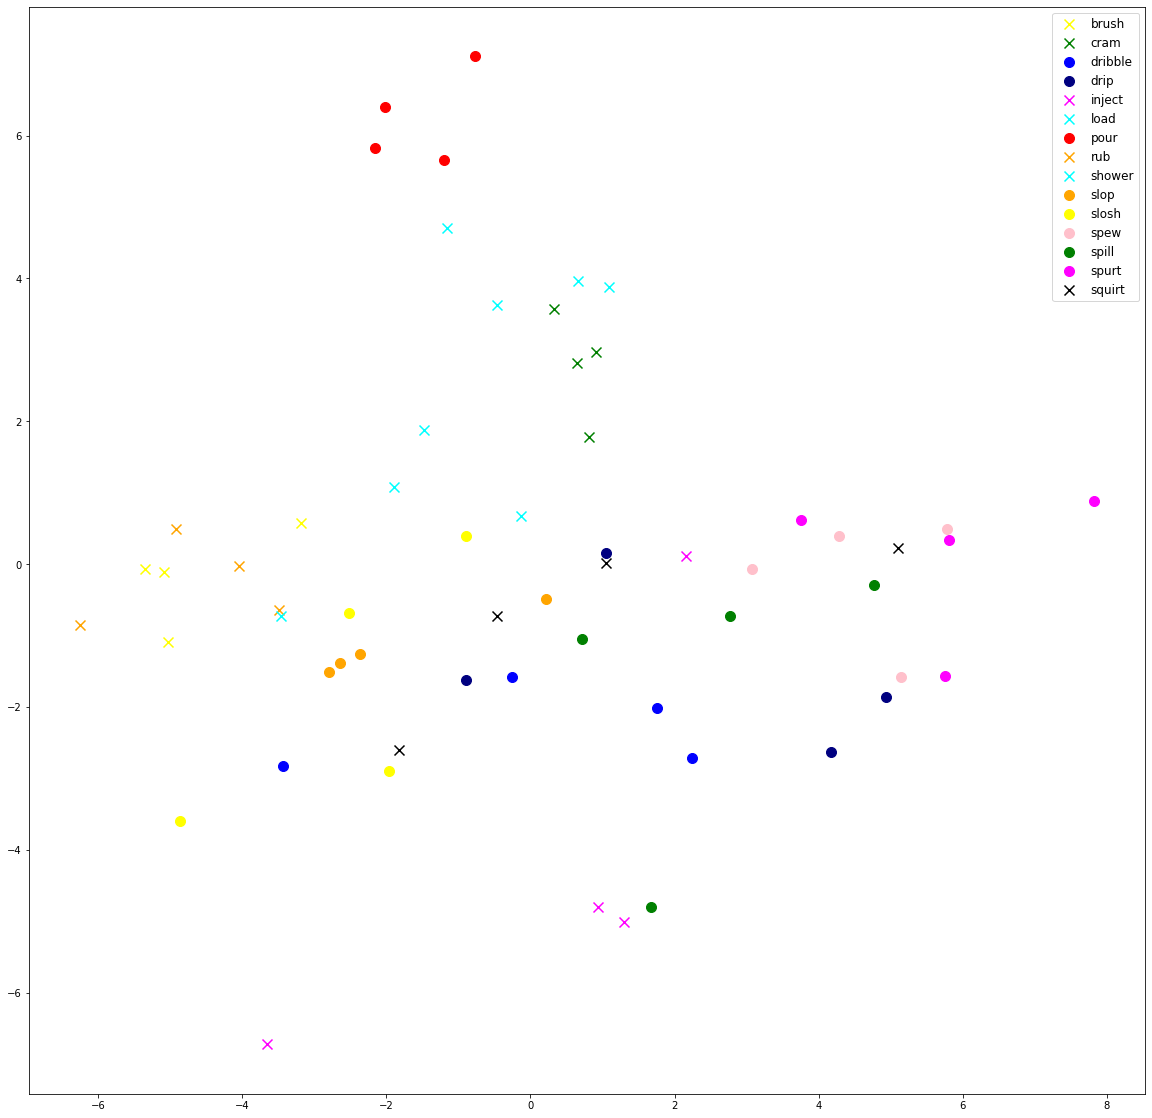

In [19]:
cdict = {'pour': 'red', 'dribble': 'blue', 'spill': 'green', 'brush':'yellow', 'rub' : 'orange', 'squirt':'black', 'spread':'navy', 'inject':'magenta','shower':'aqua','slosh':'yellow','spurt':'magenta','spew':'pink','drip':'navy','slop':'orange','cram':'green','load':'aqua'} #'run':'black','walk':'black', 'smear', 'splash'
#cdict = {'pour': 'red', 'dribble': 'red', 'spill': 'red', 'brush':'green', 'rub' : 'green', 'smear':'green'}
#markers = {'pour': 'o', 'dribble': '+', 'spill': 'v', 'brush':'x', 'rub':'2', 'smear':'3' }
markers = {'pour': 'o', 'dribble': 'o', 'spill': 'o', 'brush':'x', 'rub':'x', 'squirt':'x', 'spread':'x', 'inject':'x','shower':'x','slosh':'o','spurt':'o','spew':'o','drip':'o','slop':'o','cram':'x','load':'x' } #'run':'+','walk':'+',
#labels = {'pour': 'enable', 'dribble': 'enable', 'spill': 'enable', 'brush':'cause', 'rub' : 'cause', 'smear':'cause'}
labels = {'pour': 'pour', 'dribble': 'dribble', 'spill': 'spill', 'brush':'brush', 'rub' : 'rub', 'squirt':'squirt','spread':'spread','inject':'inject','shower':'shower','slosh':'slosh','spurt':'spurt','spew':'spew','drip':'drip','slop':'slop','cram':'cram','load':'load'} #'run':'run','walk':'walk',

scatter_x = verb_pca[:,0]
scatter_y = verb_pca[:,1]
fig, ax = plt.subplots(figsize=(20, 20))
for g in np.unique(df.Type):
    ix = np.where(df.Type == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = labels[g], s=100, marker=markers[g])
ax.legend(prop={'size': 12})
plt.show()

In [ ]:
1.1.2.1 Causative / Inchoative Alternation

Comments: This alternation is known by a variety of other names, including "anti-causative" and "ergative." C.S. Smith ( 1970) 
    provides a good discussion of the factors licensing this alternation and causative alternations in general. 
    The verbs undergoing the causative/inchoative alternation can roughly be characterized as verbs of change of 
    state or change of position. Selected verbs that do not undergo the alternation have also been listed, including
    some verbs that are only used transitively, such as verbs of change of possession, and some that are only used intransitively, 
    such as verbs of appearance, disappearance, and occurrence. Few psych-verbs-verbs of psychological state-participate in 
    the causative/inchoative alternation in English, but all verbs of this type appear to participate in the French, Italian, 
    and Russian counterparts of this alternation; see Ruwet (1972) for a discussion of French psych-verbs. 
    See also comments under Middle Alternation above for a comparison of the causative/inchoative and middle alternations
    
    
    13 Verbs of Change of Possession
    13.2 Contribute Verbs
    
    
    Class Members: administer, contribute, disburse, distribute, donate, extend, forfeit, proffer, refer, 
        reimburse, relinquish, remit, restore, return, sacrifice, submit, surrender, transfer
    
    ·Comments: These verbs of change of possession do not allow the dative alternation. 
        Their failure to be found in the double object construction has often been attributed to their Latinate character 
        (see sec. 2. 1, Dative Alternation). Like the alternating verbs of change of possession, these verbs are 
        characterized by taking a prepositional phrase headed by the preposition to.
    

In [ ]:
You know in English where you have the form of a verb that can be used both transitively and intransitively?

1. The vase broke.

2. John broke the vase. 

3. The ice melted.

4. The sun melted the ice.

In these examples, the intransitive form (1) is the inchoative, and the transitive form (2) is the causative (because y’know, you’ve added a ‘causer’) - hence ‘causative-inchoative alternation’.

Native speakers of a language intuitively know whether or not a verb can participate in this alternation (for example, (6 and 8 sound obscure to me as a native English speaker), but how would you explain this to a foreigner? Some linguists have suggested that verbs entailing a change of state can participate, but:

5. Kim assassinated the senator.

6. *The senator assassinated.

7. The soldiers destroyed the city.

8. *The city destroyed.

There’s no denying that there’s been a change of state here: the senator was alive, and now he’s dead. The city was all good, now it’s not. Definite change of state. So why doesn’t it work?

As it turns out, only a finite number of verbs can have a causative and inchoative participle. These verbs are summarised by Smith (1970) as those that denote an activity that can occur spontaneously, but also over which external control can be assumed (that is, the addition of a ‘causer’) - like the verbs ‘break’ and ‘melt’. ‘Assassinate’ and ‘destroy’ do not work because although it isn’t the ‘causer’ that undergoes the change of state, assassination and destruction cannot occur spontaneously - they can’t have an inchoative participle. Likewise the following verbs cannot participate, because they lack a causative variant:

9. The flowers bloomed.

10. *John bloomed the flowers.

11. His health deteriorated.

12. *He deteriorated his health.

In [ ]:
ss2 =[
    "How much would you pay for that pan today?",
    "She's working at the hospital to pay for her education.",
    "That's what you pay me to do.",
    "I think a few days cleaning in the stable would pay for it.",
    "It cannot remit the divine punishment for sin; that also is in the hands of God alone.",
    "The French war indemnity enabled him to redeem a considerable portion of the state debt and to remit certain taxes.",
    "Though kind to his students, he refused to remit their fees.",
    "Usually, employers automatically deduct an employee portion of FICA taxes from their paycheck and remit them to the IRS.",
    "I expect you to repay me once it's sold.",
    "Where would he come up with that kind of money to repay you?",
    "The government being unable to repay its loans from the banks compelled the latter to suspend the conversion of their notes, which began to depreciate in value.",
    "He had to repay the odious debt to the Council.",
    "The school is not able to reimburse the cost of items lost.",
    "The Group will not be able to reimburse expenses for all members or on a regular basis.",
    "The buyer will often have to agree to reimburse the seller 's costs if it withdraws from the transaction without cause.",
    "Be sure to reimburse committee members for any out of pocket expenses they incurred.",
    "Give me the letter.",
    "Let the son marry the daughter, if both agree, and give them the treasure as a wedding portion.",
    "I only said that you were to give them the grain.",
    "Now I have a mind to give this book to one of you.",
    "We'll donate it for good luck so's you're sure to come back.",
    "Could you persuade the readers of your newsletter to donate to my charity?",
    "Or should they be expected to donate organs out of charity?",
    "We donate money, time and expertise to promote science and engineering education.",
    "I'm going to feed the chickens.",
    "Let's go to the park and feed the ducks.",
    "You should never feed a human a rock, even by mistake.",
    "They feed upon nearly all vegetable substances, but drink little.",
    "A priest can administer this sacrament.",
    "The courts aim to administer justice as defined by the law.",
    "This small unit uses fluorescent lights to administer their healing blue light.",
    "By far the best way to administer the oil is in capsules.",
    "I'll lend you one of my night gowns and find some clothes for you to wear in the morning.",
    "It is also an offense to lend or hire a crossbow to anyone under the age of 17.",
    "They lend money to people to buy houses.",
    "Fannie Mae doesn't lend money directly to consumers.",
    "Please don't be surprised if Mr. Bylun opts not to return your call.",
    "The story related the successful return of a young boy kidnapped from his San Francisco home.",
    "Why did you not return it to us at once?",
    "She left the library to return Damian's phone."
    
    
]

In [ ]:
You know in English where you have the form of a verb that can be used both transitively and intransitively?

1. The vase broke.

2. John broke the vase. 

3. The ice melted.

4. The sun melted the ice.

In these examples, the intransitive form (1) is the inchoative, and the transitive form (2) is the causative (because y’know, you’ve added a ‘causer’) - hence ‘causative-inchoative alternation’.

Native speakers of a language intuitively know whether or not a verb can participate in this alternation (for example, (6 and 8 sound obscure to me as a native English speaker), but how would you explain this to a foreigner? Some linguists have suggested that verbs entailing a change of state can participate, but:

5. Kim assassinated the senator.

6. *The senator assassinated.

7. The soldiers destroyed the city.

8. *The city destroyed.

There’s no denying that there’s been a change of state here: the senator was alive, and now he’s dead. The city was all good, now it’s not. Definite change of state. So why doesn’t it work?

As it turns out, only a finite number of verbs can have a causative and inchoative participle. These verbs are summarised by Smith (1970) as those that denote an activity that can occur spontaneously, but also over which external control can be assumed (that is, the addition of a ‘causer’) - like the verbs ‘break’ and ‘melt’. ‘Assassinate’ and ‘destroy’ do not work because although it isn’t the ‘causer’ that undergoes the change of state, assassination and destruction cannot occur spontaneously - they can’t have an inchoative participle. Likewise the following verbs cannot participate, because they lack a causative variant:

9. The flowers bloomed.

10. *John bloomed the flowers.

11. His health deteriorated.

12. *He deteriorated his health.

In [328]:
ss2 =[
    "How much would you pay for that pan today?",
    "She's working at the hospital to pay for her education.",
    "That's what you pay me to do.",
    "I think a few days cleaning in the stable would pay for it.",
    "It cannot remit the divine punishment for sin; that also is in the hands of God alone.",
    "The French war indemnity enabled him to redeem a considerable portion of the state debt and to remit certain taxes.",
    "Though kind to his students, he refused to remit their fees.",
    "Usually, employers automatically deduct an employee portion of FICA taxes from their paycheck and remit them to the IRS.",
    "I expect you to repay me once it's sold.",
    "Where would he come up with that kind of money to repay you?",
    "The government being unable to repay its loans from the banks compelled the latter to suspend the conversion of their notes, which began to depreciate in value.",
    "He had to repay the odious debt to the Council.",
    "The school is not able to reimburse the cost of items lost.",
    "The Group will not be able to reimburse expenses for all members or on a regular basis.",
    "The buyer will often have to agree to reimburse the seller 's costs if it withdraws from the transaction without cause.",
    "Be sure to reimburse committee members for any out of pocket expenses they incurred.",
    "Give me the letter.",
    "Let the son marry the daughter, if both agree, and give them the treasure as a wedding portion.",
    "I only said that you were to give them the grain.",
    "Now I have a mind to give this book to one of you.",
    "We'll donate it for good luck so's you're sure to come back.",
    "Could you persuade the readers of your newsletter to donate to my charity?",
    "Or should they be expected to donate organs out of charity?",
    "We donate money, time and expertise to promote science and engineering education.",
    "I'm going to feed the chickens.",
    "Let's go to the park and feed the ducks.",
    "You should never feed a human a rock, even by mistake.",
    "They feed upon nearly all vegetable substances, but drink little.",
    "A priest can administer this sacrament.",
    "The courts aim to administer justice as defined by the law.",
    "This small unit uses fluorescent lights to administer their healing blue light.",
    "By far the best way to administer the oil is in capsules.",
    "I'll lend you one of my night gowns and find some clothes for you to wear in the morning.",
    "It is also an offense to lend or hire a crossbow to anyone under the age of 17.",
    "They lend money to people to buy houses.",
    "Fannie Mae doesn't lend money directly to consumers.",
    "Please don't be surprised if Mr. Bylun opts not to return your call.",
    "The story related the successful return of a young boy kidnapped from his San Francisco home.",
    "Why did you not return it to us at once?",
    "She left the library to return Damian's phone."
    
    
]

In [329]:
result = bert_embedding(ss2)

In [330]:
np.shape(result)

(40, 2)

In [331]:
verb_embs = []
sentence_type = []
verbs = ['pay','remit','repay','reimburse','give','donate','feed','administer','lend','return']  
for row in result:
    for verb in verbs:
        try:
            verb_index = row[0].index(verb)
            print(verb_index)
            print(verb)
            print(row[0])
            verb_embs.append(row[1][verb_index])
            #row[0].append("success")
            #print(verb,row[0])
            sentence_type.append(verb)
        except ValueError:
            print(verb,len(row[0]))
            #print(row[0])

4
pay
['how', 'much', 'would', 'you', 'pay', 'for', 'that', 'pan', 'today', '?']
remit 10
repay 10
reimburse 10
give 10
donate 10
feed 10
administer 10
lend 10
return 10
8
pay
['she', "'", 's', 'working', 'at', 'the', 'hospital', 'to', 'pay', 'for', 'her', 'education', '.']
remit 13
repay 13
reimburse 13
give 13
donate 13
feed 13
administer 13
lend 13
return 13
5
pay
['that', "'", 's', 'what', 'you', 'pay', 'me', 'to', 'do', '.']
remit 10
repay 10
reimburse 10
give 10
donate 10
feed 10
administer 10
lend 10
return 10
10
pay
['i', 'think', 'a', 'few', 'days', 'cleaning', 'in', 'the', 'stable', 'would', 'pay', 'for', 'it', '.']
remit 14
repay 14
reimburse 14
give 14
donate 14
feed 14
administer 14
lend 14
return 14
pay 19
2
remit
['it', 'cannot', 'remit', 'the', 'divine', 'punishment', 'for', 'sin', ';', 'that', 'also', 'is', 'in', 'the', 'hands', 'of', 'god', 'alone', '.']
repay 19
reimburse 19
give 19
donate 19
feed 19
administer 19
lend 19
return 19
pay 19
17
remit
['the', 'french', '

In [332]:
print(sentence_type)
print(len(sentence_type))
print(len(ss2))

['pay', 'pay', 'pay', 'pay', 'remit', 'remit', 'remit', 'remit', 'repay', 'repay', 'repay', 'repay', 'reimburse', 'reimburse', 'reimburse', 'reimburse', 'give', 'give', 'give', 'give', 'donate', 'donate', 'donate', 'donate', 'feed', 'feed', 'feed', 'feed', 'administer', 'administer', 'administer', 'administer', 'lend', 'lend', 'lend', 'lend', 'return', 'return', 'return', 'return']
40
40


In [333]:
list_of_tuples = list(zip(ss2, sentence_type))  
df = pd.DataFrame(list_of_tuples, columns = ['Sentence', 'Type']) 

In [334]:
df

Sentence        Type
0          How much would you pay for that pan today?         pay
1   She's working at the hospital to pay for her e...         pay
2                       That's what you pay me to do.         pay
3   I think a few days cleaning in the stable woul...         pay
4   It cannot remit the divine punishment for sin;...       remit
5   The French war indemnity enabled him to redeem...       remit
6   Though kind to his students, he refused to rem...       remit
7   Usually, employers automatically deduct an emp...       remit
8            I expect you to repay me once it's sold.       repay
9   Where would he come up with that kind of money...       repay
10  The government being unable to repay its loans...       repay
11    He had to repay the odious debt to the Council.       repay
12  The school is not able to reimburse the cost o...   reimburse
13  The Group will not be able to reimburse expens...   reimburse
14  The buyer will often have to agree to reimburs...   reimburse
15  Be sure to reimburse committee members for any...   reimburse
16                                Give me the letter.        give
17  Let the son marry the daughter, if both agree,...        give
18  I only said that you were to give them the grain.        give
19  Now I have a mind to give this book to one of ...        give
20  We'll donate it for good luck so's you're sure...      donate
21  Could you persuade the readers of your newslet...      donate
22  Or should they be expected to donate organs ou...      donate
23  We donate money, time and expertise to promote...      donate
24                    I'm going to feed the chickens.        feed
25           Let's go to the park and feed the ducks.        feed
26  You should never feed a human a rock, even by ...        feed
27  They feed upon nearly all vegetable substances...        feed
28            A priest can administer this sacrament.  administer
29  The courts aim to administer justice as define...  administer
30  This small unit uses fluorescent lights to adm...  administer
31  By far the best way to administer the oil is i...  administer
32  I'll lend you one of my night gowns and find s...        lend
33  It is also an offense to lend or hire a crossb...        lend
34           They lend money to people to buy houses.        lend
35  Fannie Mae doesn't lend money directly to cons...        lend
36  Please don't be surprised if Mr. Bylun opts no...      return
37  The story related the successful return of a y...      return
38           Why did you not return it to us at once?      return
39     She left the library to return Damian's phone.      return

In [335]:
verb_embs = np.array(verb_embs)
verb_embs.shape

(40, 768)

In [336]:
verb_pca = PCA(n_components=2).fit_transform(verb_embs)
verb_pca.shape

(40, 2)

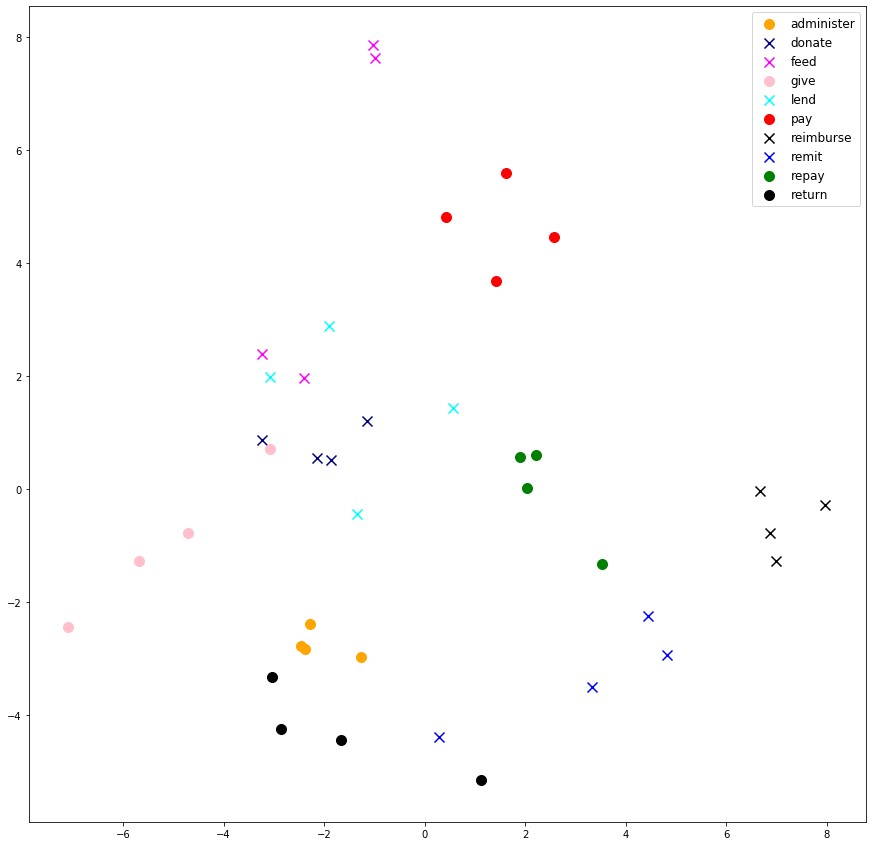

In [339]:
cdict = {'pay': 'red', 'remit': 'blue','repay':'green','reimburse':'black','give':'pink','donate':'navy','feed':'magenta','administer':'orange','lend':'aqua','return':'black'}
#cdict = {'pour': 'red', 'dribble': 'red', 'spill': 'red', 'brush':'green', 'rub' : 'green', 'smear':'green'}
#markers = {'pour': 'o', 'dribble': '+', 'spill': 'v', 'brush':'x', 'rub':'2', 'smear':'3' }
markers = {'pay': 'o', 'remit': 'x','repay':'o','reimburse':'x','give':'o','donate':'x','feed':'x','administer':'o','lend':'x','return':'o'}
#labels = {'pour': 'enable', 'dribble': 'enable', 'spill': 'enable', 'brush':'cause', 'rub' : 'cause', 'smear':'cause'}
labels = {'pay': 'pay', 'remit': 'remit','repay':'repay','reimburse':'reimburse','give':'give','donate':'donate','feed':'feed','administer':'administer','lend':'lend','return':'return'}
scatter_x = verb_pca[:,0]
scatter_y = verb_pca[:,1]
fig, ax = plt.subplots(figsize=(15, 15))
for g in np.unique(df.Type):
    ix = np.where(df.Type == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = labels[g], s=100, marker=markers[g])
ax.legend(prop={'size': 12})
plt.show()

In [387]:
ssAll = ["Go in the parlor and pour yourself a glass of sherry and put your feet up.",
      "Dean rose to pour himself a glass of milk.",
      "She leaned over to pour his coffee and let one hand rest on his shoulder.",
      "Katie sat on a barstool at the breakfast bar, watching the maid pour tea into two mugs sitting beside the stove.",
      "Grind a little cumin into the sauce and dribble olive oil over the top to garnish.",
      "Defecate many times and continually dribble urine so there is an urgent need to take control.",
      "Dribble olive oil over the top with a little paprika for color.",
      "John accidentally dribble some paint onto the carpet.",
      "One day I happened to spill water on my apron, and I lay it out to dry before the fire which was flickering on the sitting-room hearth.",
      "Tears began to spill down her face as she understood the depth of Gabriel's pain.",
      "If you spill, wash the area with water and a mild detergent.",
      "The rest of us stagger about drunkenly, spill things often and expend huge amounts of energy just staying in one place.",
      "He tried to brush it off, but it remained there.",
      "I know what time of day you brush your hair, he said in the same calm tone.",
      "It is obviously easier to brush out and clean vertical tubes open at both ends, and about 6 meters.",
      "Brush soapy water onto the flexible hoses and valve assembly.",
      "Then I slipped trying to rub mud on my pants to cover it up.",
      "The best thing to do is to rub them with snow or with cold water.",
      "Then you used a biro to rub in some ink, which was supposed to make it permanent.",
      "Rub an ovenproof dish with a peeled garlic clove.",
      "If I squeeze it a jet of molten bramley apple is going to squirt out.",
      "Remove the black plugs from the filling holes and begin to slowly squirt ink into each cell.",
      "Squirt water onto a hot plate to observe some very dramatic effects.",
      "Just squirt the colors onto the included clear plastic overlay to trace a design.",
      "Finally, she was able to inject a few words.",
      "Use a clean needle every time if you inject drugs.",
      "Inject a local anesthetic to numb the area where the line is to be inserted.",
      "There has been an increase recently in the number of people who inject steroids.",
      "Then he casually directed the rain to shower the feces from his body.",
      "She went to Llandudno ready to shower the bad tempered solider with affection.",
      "Another remedy is to shower the trees with water.",
      "The police shot tear gas and used water cannons to shower the protesters with blue-coloured water mixed with chemical irritants.",
      "Slosh the water in the plastic bottle to show how the fluid in the inner ear moves around.",
      "Slosh gasoline around, open all the doors and windows; strike a match.",
      "Squeeze a bit of lemon in, then slosh some white wine on it.",
      "Mary decided to slosh the water onto the floor",
      "A spurt of very red blood aims right toward the camera.",
      "Harrison watched the blood spurt from a second bullet that hit Kai.",
      "Smith described the first steam engine, and built toys that would spurt water, one of them known as Heron's fountain.",
      "Suddenly water spurt from the broken pipe.",
      "Second, a Fire Flower gives Mario the ability to spew fireballs.",
      "For instance, as well as the wanton killing, the other characters will now spew blood when shot or injured.",
      "The new images suggest that the neutron star at the cloud's center may still spew out bursts of energy.",
      "Access is further complicated by a hanging serac and ice couloir that regularly spew rock and ice down the approach slopes.",
      "It mixed with the rain to drip pink puddles on the ceramic floor.",
      "Blood oozed and began to drip.",
      "His foot and toes are heavily bloodstained and continue to drip blood.",
      "Allow the glasses to drip dry after the washing.",
      "Slap on a hat and slop on the sun lotion.",
      "The advice was to slop on as much sunscreen as possible.",
      "Be careful not to slop too much milk over the floor.",
      "Finally slop as much oil over the chicken as you like",
      "If you have a small table that you plan to cram a lot of guests and serving platters around, your decorations will need to be kept small and simple.",
      "You can cram a great deal of music on this pack-of-gum-sized player.",
      "Can you cram your unique offer into such a tiny space?",
      "People will try to cram as many glasses into a cabinet as they can.",
      "It was raining and I had to help load the boxes of that shit.",
      "The gunman rested back on his heels to load a new laser charge pack.",
      "Vessels go to Porman to land coke and coal, and to load iron ore and lead.",
      "Sea-going vessels load and unload in Singapore.",
    "How much would you pay for that pan today?",
    "She's working at the hospital to pay for her education.",
    "That's what you pay me to do.",
    "I think a few days cleaning in the stable would pay for it.",
    "It cannot remit the divine punishment for sin; that also is in the hands of God alone.",
    "The French war indemnity enabled him to redeem a considerable portion of the state debt and to remit certain taxes.",
    "Though kind to his students, he refused to remit their fees.",
    "Usually, employers automatically deduct an employee portion of FICA taxes from their paycheck and remit them to the IRS.",
    "I expect you to repay me once it's sold.",
    "Where would he come up with that kind of money to repay you?",
    "The government being unable to repay its loans from the banks compelled the latter to suspend the conversion of their notes, which began to depreciate in value.",
    "He had to repay the odious debt to the Council.",
    "The school is not able to reimburse the cost of items lost.",
    "The Group will not be able to reimburse expenses for all members or on a regular basis.",
    "The buyer will often have to agree to reimburse the seller 's costs if it withdraws from the transaction without cause.",
    "Be sure to reimburse committee members for any out of pocket expenses they incurred.",
    #"Give me the letter.",
    "Let the son marry the daughter, if both agree, and give them the treasure as a wedding portion.",
    "I only said that you were to give them the grain.",
    "Now I have a mind to give this book to one of you.",
    "We'll donate it for good luck so's you're sure to come back.",
    "Could you persuade the readers of your newsletter to donate to my charity?",
    "Or should they be expected to donate organs out of charity?",
    "We donate money, time and expertise to promote science and engineering education.",
    "I'm going to feed the chickens.",
    "Let's go to the park and feed the ducks.",
    "You should never feed a human a rock, even by mistake.",
    "They feed upon nearly all vegetable substances, but drink little.",
    "A priest can administer this sacrament.",
    "The courts aim to administer justice as defined by the law.",
    "This small unit uses fluorescent lights to administer their healing blue light.",
    "By far the best way to administer the oil is in capsules.",
    "I'll lend you one of my night gowns and find some clothes for you to wear in the morning.",
    "It is also an offense to lend or hire a crossbow to anyone under the age of 17.",
    "They lend money to people to buy houses.",
    "Fannie Mae doesn't lend money directly to consumers.",
    "Please don't be surprised if Mr. Bylun opts not to return your call.",
    "The story related the successful return of a young boy kidnapped from his San Francisco home.",
    "Why did you not return it to us at once?",
    "She left the library to return Damian's phone."
    
]

In [388]:
result = bert_embedding(ssAll)

In [389]:
np.shape(result)

(99, 2)

In [390]:
verb_embs = []
sentence_type = []
verbs = ['pour','dribble','spill','brush','rub','squirt','spread','inject','shower','slosh','spurt','spew','drip','slop','cram','load','pay','remit','repay','reimburse','give','donate','feed','administer','lend','return']  
for row in result:
    for verb in verbs:
        try:
            verb_index = row[0].index(verb)
            print(verb_index)
            print(verb)
            print(row[0])
            verb_embs.append(row[1][verb_index])
            #row[0].append("success")
            #print(verb,row[0])
            sentence_type.append(verb)
        except ValueError:
            print(verb,len(row[0]))
            #print(row[0])

5
pour
['go', 'in', 'the', 'parlor', 'and', 'pour', 'yourself', 'a', 'glass', 'of', 'sherry', 'and', 'put', 'your', 'feet', 'up', '.']
dribble 17
spill 17
brush 17
rub 17
squirt 17
spread 17
inject 17
shower 17
slosh 17
spurt 17
spew 17
drip 17
slop 17
cram 17
load 17
pay 17
remit 17
repay 17
reimburse 17
give 17
donate 17
feed 17
administer 17
lend 17
return 17
3
pour
['dean', 'rose', 'to', 'pour', 'himself', 'a', 'glass', 'of', 'milk', '.']
dribble 10
spill 10
brush 10
rub 10
squirt 10
spread 10
inject 10
shower 10
slosh 10
spurt 10
spew 10
drip 10
slop 10
cram 10
load 10
pay 10
remit 10
repay 10
reimburse 10
give 10
donate 10
feed 10
administer 10
lend 10
return 10
4
pour
['she', 'leaned', 'over', 'to', 'pour', 'his', 'coffee', 'and', 'let', 'one', 'hand', 'rest', 'on', 'his', 'shoulder', '.']
dribble 16
spill 16
brush 16
rub 16
squirt 16
spread 16
inject 16
shower 16
slosh 16
spurt 16
spew 16
drip 16
slop 16
cram 16
load 16
pay 16
remit 16
repay 16
reimburse 16
give 16
donate 16
fe

In [394]:
print(sentence_type)
print(len(sentence_type))
print(len(ssAll))

['pour', 'pour', 'pour', 'pour', 'dribble', 'dribble', 'dribble', 'dribble', 'spill', 'spill', 'spill', 'spill', 'brush', 'brush', 'brush', 'brush', 'rub', 'rub', 'rub', 'rub', 'squirt', 'squirt', 'squirt', 'squirt', 'inject', 'inject', 'inject', 'inject', 'shower', 'shower', 'shower', 'shower', 'slosh', 'slosh', 'slosh', 'slosh', 'spurt', 'spurt', 'spurt', 'spurt', 'spew', 'spew', 'spew', 'spew', 'drip', 'drip', 'drip', 'drip', 'slop', 'slop', 'slop', 'slop', 'cram', 'cram', 'cram', 'cram', 'load', 'load', 'load', 'load', 'pay', 'pay', 'pay', 'pay', 'remit', 'remit', 'remit', 'remit', 'repay', 'repay', 'repay', 'repay', 'reimburse', 'reimburse', 'reimburse', 'reimburse', 'give', 'give', 'give', 'donate', 'donate', 'donate', 'donate', 'feed', 'feed', 'feed', 'feed', 'administer', 'administer', 'administer', 'administer', 'lend', 'lend', 'lend', 'lend', 'return', 'return', 'return', 'return']
99
99


In [347]:
list_of_tuples = list(zip(ssAll, sentence_type))  
df = pd.DataFrame(list_of_tuples, columns = ['Sentence', 'Type']) 

In [348]:
df

Sentence     Type
0   Go in the parlor and pour yourself a glass of ...     pour
1          Dean rose to pour himself a glass of milk.     pour
2   She leaned over to pour his coffee and let one...     pour
3   Katie sat on a barstool at the breakfast bar, ...     pour
4   Grind a little cumin into the sauce and dribbl...  dribble
..                                                ...      ...
95  Fannie Mae doesn't lend money directly to cons...     lend
96  Please don't be surprised if Mr. Bylun opts no...   return
97  The story related the successful return of a y...   return
98           Why did you not return it to us at once?   return
99     She left the library to return Damian's phone.   return

[100 rows x 2 columns]

In [391]:
verb_embs = np.array(verb_embs)
verb_embs.shape

(99, 768)

In [392]:
verb_pca = PCA(n_components=3).fit_transform(verb_embs)
verb_pca.shape

(99, 3)

In [ ]:
cdict = {'pour': 'red', 'dribble': 'blue', 'spill': 'green', 'brush':'yellow', 'rub' : 'orange', 'squirt':'black', 'spread':'navy', 'inject':'magenta','shower':'aqua','slosh':'yellow','spurt':'magenta','spew':'pink','drip':'navy','slop':'orange','cram':'green','load':'aqua'} #'run':'black','walk':'black', 'smear', 'splash'
#cdict = {'pour': 'red', 'dribble': 'red', 'spill': 'red', 'brush':'green', 'rub' : 'green', 'smear':'green'}
#markers = {'pour': 'o', 'dribble': '+', 'spill': 'v', 'brush':'x', 'rub':'2', 'smear':'3' }
markers = {'pour': 'o', 'dribble': 'o', 'spill': 'o', 'brush':'x', 'rub':'x', 'squirt':'x', 'spread':'x', 'inject':'x','shower':'x','slosh':'o','spurt':'o','spew':'o','drip':'o','slop':'o','cram':'x','load':'x' } #'run':'+','walk':'+',
#labels = {'pour': 'enable', 'dribble': 'enable', 'spill': 'enable', 'brush':'cause', 'rub' : 'cause', 'smear':'cause'}
labels = {'pour': 'pour', 'dribble': 'dribble', 'spill': 'spill', 'brush':'brush', 'rub' : 'rub', 'squirt':'squirt','spread':'spread','inject':'inject','shower':'shower','slosh':'slosh','spurt':'spurt','spew':'spew','drip':'drip','slop':'slop','cram':'cram','load':'load'} #'run':'run','walk':'walk',


In [361]:
from mpl_toolkits.mplot3d import Axes3D

In [1]:
cdict = {'pour': 'red', 'dribble': 'blue', 'spill': 'green', 'brush':'yellow', 'rub' : 'orange', 'squirt':'black', 'spread':'navy', 'inject':'magenta','shower':'aqua','slosh':'yellow','spurt':'magenta','spew':'pink','drip':'navy','slop':'orange','cram':'green','load':'aqua','pay': 'red', 'remit': 'blue','repay':'green','reimburse':'black','give':'pink','donate':'navy','feed':'magenta','administer':'orange','lend':'aqua','return':'black'}
#cdict = {'pour': 'red', 'dribble': 'red', 'spill': 'red', 'brush':'green', 'rub' : 'green', 'smear':'green'}
#markers = {'pour': 'o', 'dribble': '+', 'spill': 'v', 'brush':'x', 'rub':'2', 'smear':'3' }
markers = {'pour': '+', 'dribble': '+', 'spill': '+', 'brush':'v', 'rub':'v', 'squirt':'v', 'spread':'v', 'inject':'v','shower':'v','slosh':'+','spurt':'+','spew':'+','drip':'+','slop':'+','cram':'v','load':'v' ,'pay': 'o', 'remit': 'x','repay':'o','reimburse':'x','give':'o','donate':'x','feed':'x','administer':'o','lend':'x','return':'o'}
#labels = {'pour': 'enable', 'dribble': 'enable', 'spill': 'enable', 'brush':'cause', 'rub' : 'cause', 'smear':'cause'}
labels = {'pour': 'pour', 'dribble': 'dribble', 'spill': 'spill', 'brush':'brush', 'rub' : 'rub', 'squirt':'squirt','spread':'spread','inject':'inject','shower':'shower','slosh':'slosh','spurt':'spurt','spew':'spew','drip':'drip','slop':'slop','cram':'cram','load':'load','pay': 'pay', 'remit': 'remit','repay':'repay','reimburse':'reimburse','give':'give','donate':'donate','feed':'feed','administer':'administer','lend':'lend','return':'return'}
scatter_x = verb_pca[:,0]
scatter_y = verb_pca[:,1]
scatter_z = verb_pca[:,2]
#fig, ax = plt.subplots(figsize=(20, 20))
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('xkcd:black')
for g in np.unique(df.Type):
    ix = np.where(df.Type == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], scatter_z[ix], s=60, c = cdict[g], label = labels[g], marker=markers[g])
ax.legend(prop={'size': 12})
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#ax.view_init(elev=20., azim=-35)
plt.show()

NameError: name 'verb_pca' is not defined

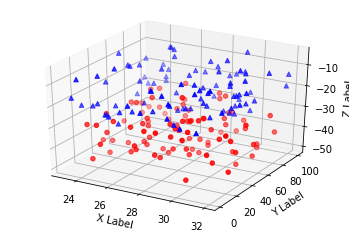

In [366]:
def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()